# Formants

In [1]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


In [2]:
plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
frequency, wave = wavfile.read("male_a_spa.wav")

In [4]:
frequency

16000

In [5]:
wave[:,0]

array([ 0,  0,  0, ..., 27, 21,  0], dtype=int16)

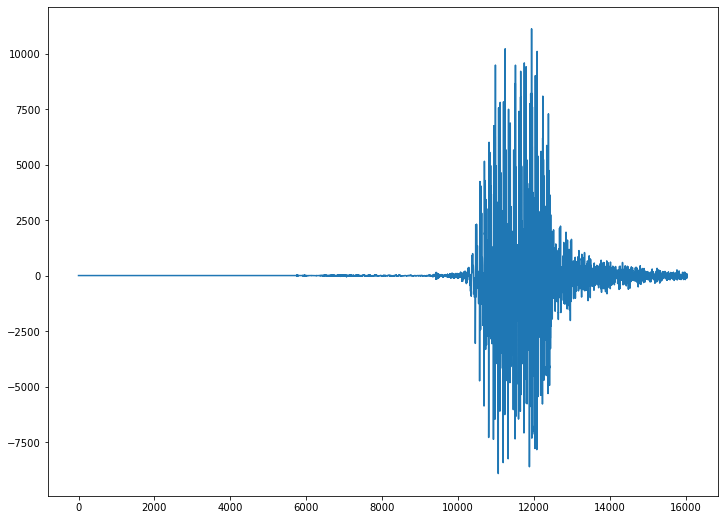

In [6]:
plt.plot(wave[:,0])

In [7]:
frequencies, time, spectrogram = signal.spectrogram(wave[:,0], frequency)
spectrogram.shape

(129, 71)

In [8]:
frequencies.shape

(129,)

In [9]:
time

array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974, 0.988])

In [10]:
time.shape

(71,)

In [11]:
spectrogram

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.74202353e-01, 8.29268098e-02, 5.47075689e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.24529076e+00, 6.70796156e+00, 1.15944366e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.70883989e+00, 7.28440732e-02, 1.12373095e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.26663426e-05, 1.03895676e-04, 3.31582050e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.10231727e-05, 1.22152351e-05, 3.88240551e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.39698092e-08, 1.00242542e-05, 5.16494401e-06]], dtype=float32)

In [12]:
spectrogram.shape

(129, 71)

In [13]:
cmap=get_cmap("coolwarm")

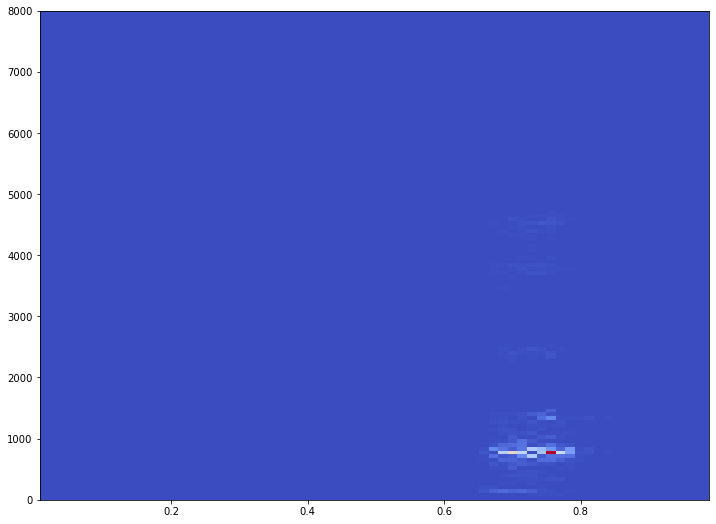

In [14]:
plt.pcolormesh(time, frequencies, spectrogram,cmap=cmap)

/home/ma0/miniconda3/envs/master_thesis/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7747: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


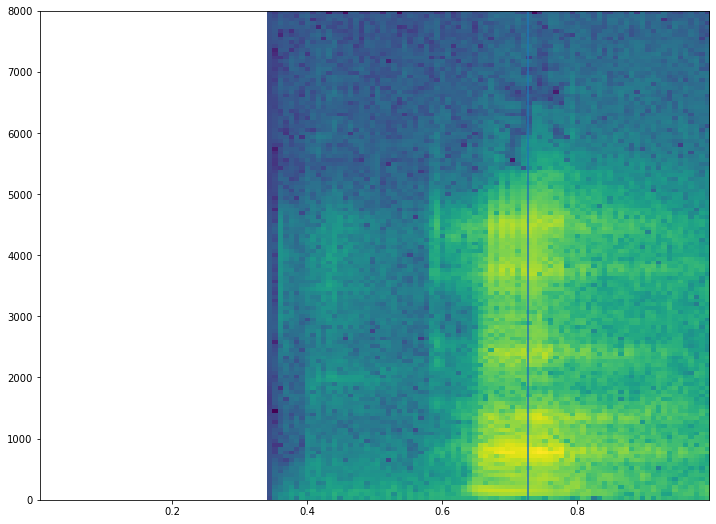

In [15]:
specgram, frequencies_specgram, time_specgram, im_specgram = plt.specgram(wave[:,0], Fs=frequency)
plt.axvline(time_specgram[90])

In [16]:
wave.shape

(16043, 2)

Text(0, 0.5, 'Frequency')

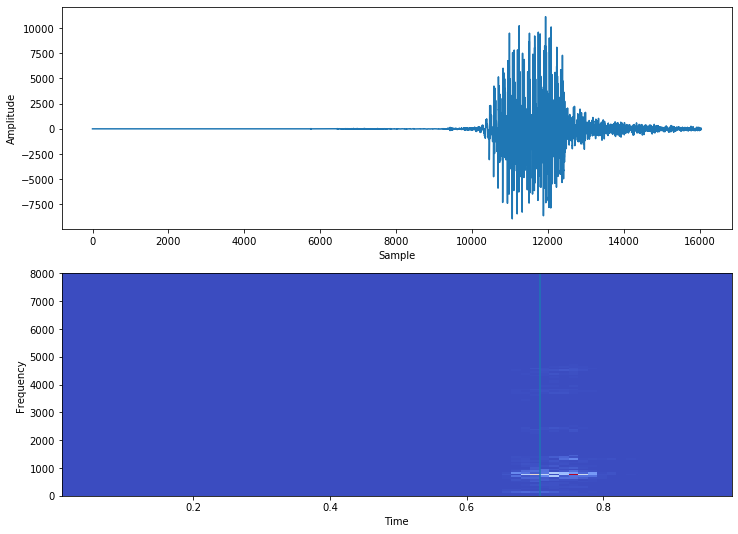

In [17]:
plt.subplot(211)
plt.plot(wave[:,0])
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the spectrogram
plt.subplot(212)
plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')

In [18]:
local_maxs = signal.argrelextrema(spectrogram, np.greater, axis=1)
local_maxs

(array([  0,   0,   0, ..., 128, 128, 128]),
 array([27, 30, 35, ..., 63, 66, 69]))

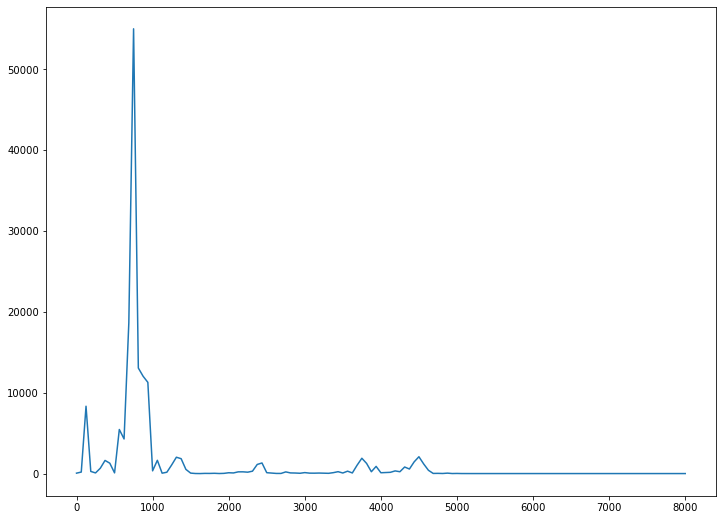

In [19]:
plt.plot(frequencies, spectrogram.T[50])

In [20]:
maxs_i = np.apply_along_axis(np.argmax, 0, spectrogram)
maxs_i.shape

(71,)

In [21]:
maxs_i

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 55, 64,  2,  1,  2,  1, 56,  1,  4,  2,
        1,  2,  1,  2,  2,  3,  1,  2, 72, 69, 69,  2, 12, 13, 12, 12, 12,
       13, 12, 12, 12, 12, 12, 12, 13, 21, 21, 13, 12, 12, 13, 12, 12, 12,
       12, 15,  3])

In [22]:
frequencies[maxs_i]

array([   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
       3437.5, 4000. ,  125. ,   62.5,  125. ,   62.5, 3500. ,   62.5,
        250. ,  125. ,   62.5,  125. ,   62.5,  125. ,  125. ,  187.5,
         62.5,  125. , 4500. , 4312.5, 4312.5,  125. ,  750. ,  812.5,
        750. ,  750. ,  750. ,  812.5,  750. ,  750. ,  750. ,  750. ,
        750. ,  750. ,  812.5, 1312.5, 1312.5,  812.5,  750. ,  750. ,
        812.5,  750. ,  750. ,  750. ,  750. ,  937.5,  187.5])

In [23]:
maxs = np.apply_along_axis(np.amax, 0, spectrogram)
maxs.shape

(71,)

In [24]:
maxs_i[maxs>10]

array([ 2, 12, 13, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12, 13, 21, 21, 13,
       12, 12, 13, 12, 12, 12, 12, 15,  3])

In [34]:
maxs

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.2982080e-05, 1.1322334e-02, 3.2906424e-02, 6.6498861e-02,
       1.7183270e-01, 3.2421437e-01, 1.6740878e-01, 7.8989476e-01,
       1.4035244e-01, 8.7938845e-01, 7.5483018e-01, 2.4244475e-01,
       8.3087409e-01, 7.2259617e-01, 2.6914993e-01, 3.5378298e-01,
       2.8737697e-01, 1.1276757e+00, 3.8373983e+00, 6.6336398e+00,
       7.2394190e+00, 1.2680167e+02, 2.8649773e+03, 1.9293271e+04,
       5.0341648e+04, 7.3732336e+04, 5.4950852e+04, 4.7771980e+04,
       4.3040555e+04, 1.3560247e+05, 6.0346469e+04, 2.6256076e+04,
       1.6601473e+03, 2.5227625e+03, 4.9427722e+02, 8.0274738e

In [40]:
hpf_maxs_i = (maxs>10).astype(np.int) * maxs_i
hpf_maxs_i

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 12, 13, 12, 12, 12,
       13, 12, 12, 12, 12, 12, 12, 13, 21, 21, 13, 12, 12, 13, 12, 12, 12,
       12, 15,  3])

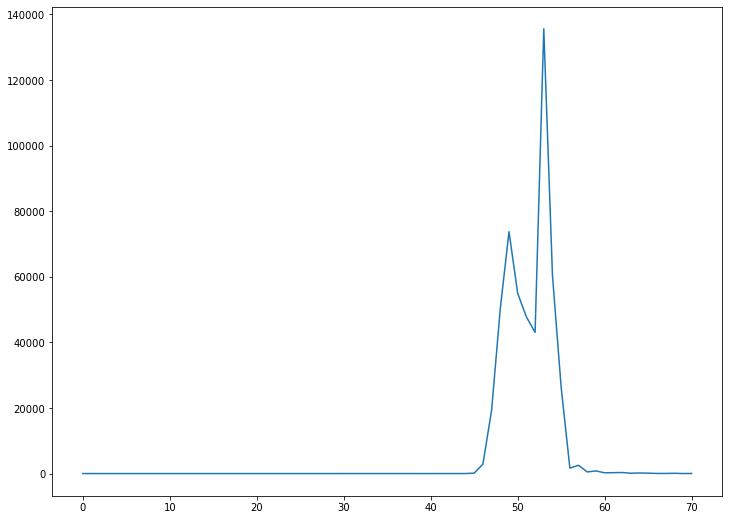

In [26]:
plt.plot(maxs)

Text(0, 0.5, 'Frequency')

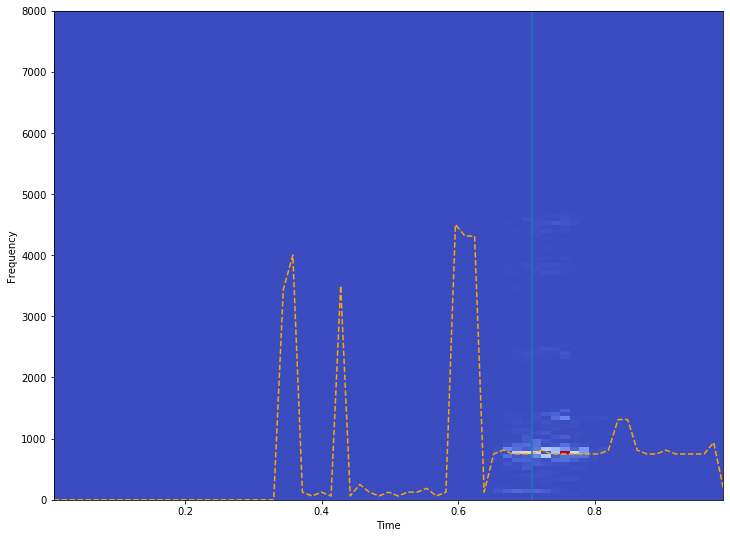

In [42]:
plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)
plt.plot(time,frequencies[maxs_i],"--",color="orange")
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

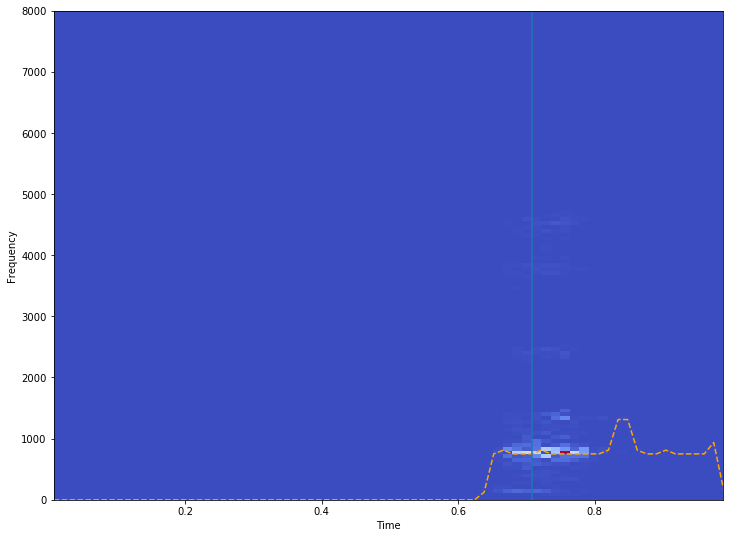

In [41]:
plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)
plt.plot(time,frequencies[hpf_maxs_i],"--",color="orange")
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')

In [ ]:
signal.argrelextrema(spectrogram.T[50], np.greater)

In [ ]:
signal.find_peaks(spectrogram.T[50])

In [ ]:
specgram.shape

In [ ]:
plt.plot(frequencies_specgram, specgram.T[90])

In [ ]:
signal.argrelextrema(specgram.T[50], np.greater)